In [129]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [130]:
def So(m,Cd,rho,v):
    g=9.806 #m/s
    return (2*g*m)/(rho*Cd*v**2)

def ancho_Cruciforme(A,LWR):
    W=np.sqrt(A/(2*LWR-1))
    return W

def densidad_aire(h):
    # Definición de constantes
    rho_0 = 1.225  # kg/m^3
    g = 9.81  # m/s^2
    M = 0.02897  # kg/mol
    R = 8.3144598  # J/mol·K
    T0 = 288.15  # K

    rho = rho_0 * np.exp(-g * M * h / (R * T0))
    return rho

def Do(L,LWR):
    return 2*L/LWR*np.sqrt((2*LWR-1)/np.pi) # Poner la ecuacion en las notas

def diametro(A):
    return np.sqrt((4*A)/np.pi)

def b(L, a):
    b2 = (3*L - 2*np.pi*a + np.sqrt(3*L**2 + 6*np.pi*L*a - 5*np.pi**2*a**2)) / (3*np.pi)
    
    return b2

CD_LWR = lambda x: 2.75- 1.4*x + 0.34*x**2 -0.03*x**3

## Geometrias de paracaidas

In [131]:
g = 9.806 # m/s
m = 60 #+-5 Kg
rho = 1.225 #kg/m^3
Cd1 = .73 # +-0.1 Cruciform LWR=3.5
Dp_Do = 0.711 #
Cd2 = 0.7 # +-0.175 Circular 
v1 = 10 # m/s o menor
v2 = 25 # m/s
a1 = 2*g/(rho*v1**2)
a2 = 2*g/(rho*v2**2)

In [132]:
A1 = So(m,CD_LWR(3),densidad_aire(500),v1) #área cruciforma LWD=3.2

A2 = So(m,CD_LWR(3.4),densidad_aire(500),v1) #área cruciforma LWD=3.5

A3 = So(m,CD_LWR(3.8),densidad_aire(500),v1) #área cruciforma LWD=3.8

A4 = So(m, CD_LWR(2.28), densidad_aire(0), v1)

AS = So(m,Cd2,rho,v2) #área semielipse



In [133]:
print(densidad_aire(0))

1.225


In [134]:
#np.sqrt(Total) # Lado de un solo pliego pero no es lo que se necesita

In [135]:
#Definición de tabla para visualización

df = pd.DataFrame()

Dc_Do = 1.15

areas=[A4, A1,A2,A3,AS]
Diametro=np.array([diametro(A4) ,diametro(A1), diametro(A2), diametro(A3), diametro(AS)])
Cd=[CD_LWR(2.28), CD_LWR(3), CD_LWR(3.4), CD_LWR(3.8), Cd2]
W = Dc_Do*Diametro*np.array([1/2.28, 1/3, 1/3.4, 1/3.8,1 ]) # Dc/Do*(Do)

df['LwR']=[2.28, 3, 3.4, 3.8, 'NA']
df['Cd'] = Cd
df['So'] = areas
df['Do']= Diametro
df['Dc=L'] = Dc_Do*Diametro
df['Sc'] = 2*(Dc_Do*Diametro)*W - W**2
df['Dp'] = Dp_Do*Diametro
df['Sp'] = np.pi*(0.711*Diametro/2)**2
df['W'] = W
df['(L-W)/2'] = (Dc_Do*Diametro - W)/2

#print(df)

densidad_

In [136]:
df

,LwR,Cd,So,Do,Dc=L,Sc,Dp,Sp,W,(L-W)/2
0,2.28,0.969885,9.904136,3.551104,4.083769,11.420963,2.524835,5.006749,1.791127,1.146321
1,3,0.800000,12.741057,4.027706,4.631862,11.918971,2.863699,6.440872,1.543954,1.543954
2,3.4,0.741280,13.750332,4.184192,4.811821,11.616870,2.974961,6.951082,1.415242,1.698290
3,3.8,0.693440,14.698959,4.326118,4.975036,11.312774,3.075870,7.430632,1.309220,1.832908
4,NA,0.700000,2.195629,1.671993,1.922792,3.697131,1.188787,1.109937,1.922792,0.000000


In [137]:
# Cuerdas
print(df['Do'])

0    3.551104
1    4.027706
2    4.184192
3    4.326118
4    1.671993
Name: Do, dtype: float64


In [146]:
print(2*(Dc_Do*Diametro)*W )

[13.03793868 14.7877932  15.36233462 15.88341625  6.13875252]


In [139]:
def gravitational_acceleration_at_altitude(h):
    # Gravitational constant (m^3 kg^-1 s^-2)
    G = 6.67430e-11
    
    # Mass of the Earth (kg)
    M = 5.972e24
    
    # Radius of the Earth (m)
    R = 6.371e6
    
    # Calculate gravitational acceleration at altitude h
    g_h = (G * M) / (R + h)**2
    
    return g_h

# Calculate gravity at 4500 meters
altitude = 4500  # in meters
gravity_at_4500m = gravitational_acceleration_at_altitude(altitude)

print(f"The gravitational acceleration at an altitude of {altitude} meters is {gravity_at_4500m} m/s^2.")


The gravitational acceleration at an altitude of 4500 meters is 9.806115913805964 m/s^2.


## Medidas de paracaidas de pruebas 3D

In [140]:
df1 = pd.DataFrame()


Cd=[CD_LWR(3),CD_LWR(3.4),CD_LWR(3.8),Cd2]
Dp = (0.711/(1.19))*15*np.array([3,3.4,3.8,1 ])
h = [b(3*15,Dp[0]/2), b(3.4*15,Dp[1]/2), b(3.8*15,Dp[2]/2), b(15,Dp[3]/2)]
df1['Dc=L']= 15*np.array([3,3.4,3.8,1 ])
df1['W']=np.array([15,15,15,15])

df1['Dp'] = Dp
df1['h'] = h

print(df1)

   Dc=L   W         Dp          h
0  45.0  15  26.886555  15.178312
1  51.0  15  30.471429  17.202087
2  57.0  15  34.056303  19.225862
3  15.0  15   8.962185   5.059437


In [141]:
df1

,Dc=L,W,Dp,h
0,45.0,15,26.886555,15.178312
1,51.0,15,30.471429,17.202087
2,57.0,15,34.056303,19.225862
3,15.0,15,8.962185,5.059437


## Geometria del cruciforme

In [142]:


LWR1=3
LWR2=3.4
LWR3=3.8
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W
print(L,W) # metros

4.7889355278498 1.5963118426165999


## Cruva del paracaidas

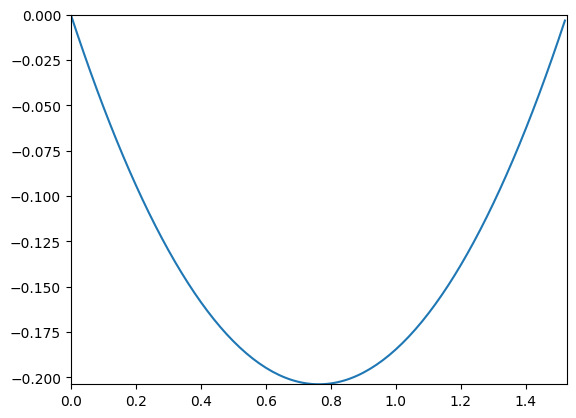

In [143]:
#def curva_paracaidas(A1,Theta,x):
W=ancho_Cruciforme(A1, LWR1)
L=LWR1*W

Fd=densidad_aire(500)*v1**2*CD_LWR(3.2)/2
dT=m*g/4*ancho_Cruciforme(A1, LWR1) #Tension
Theta= 3*np.pi/4+np.pi/8
T0=dT*np.cos(Theta)
Gamma=dT*1.01/(W*T0)
a=np.arcsinh(W/2*Gamma)/Gamma
h=(np.cosh(Gamma*a)-1)/Gamma
x=np.arange(0,2*a, .01)
y= (np.cosh(Gamma*(x-a))-np.cosh(Gamma*a))/Gamma
#    return y

plt.plot(x,-y)
plt.ylim(h,0)
plt.xlim(0,2*a)
plt.show()

In [144]:
print(2*a,2*a/W, W, h, Fd, dT)

1.5259250167362997 0.9559065941871825 1.5963118426165999 -0.20390269734243807 44.363464512178716 234.80150893047562
